In [1]:
import dexpy.optimal
from dexpy.model import make_model, ModelOrder
from dexpy.design import coded_to_actual
from patsy import dmatrix
import numpy as np
import ProcessOptimizer
from ProcessOptimizer.space import Integer, Categorical, Real, Space
import numpy as np
import pandas as pd

In [2]:
print(ProcessOptimizer.__version__)

1.0.0


# These cells are all the very early experimentation

In [3]:
space_design = Space(dimensions=[Integer(10, 40, name='ul indicator'),
         Integer(20, 100, name='ul base'),
         Integer(20, 100, name='ul acid'),
         Integer(0, 50, name='ul water1'),
         Integer(0, 10, name='ul water2'),
         #Categorical(["boric and citric", "citric only"])
         ])

In [112]:
dmatrix('a + b + a:b', data={'a': ['sdsa', 'sdsa4', '5u5'], 'b': [4, 5, 6]}, return_type='matrix')

DesignMatrix with shape (3, 6)
  Intercept  a[T.sdsa]  a[T.sdsa4]  b  a[T.sdsa]:b  a[T.sdsa4]:b
          1          1           0  4            4             0
          1          0           1  5            0             5
          1          0           0  6            0             0
  Terms:
    'Intercept' (column 0)
    'a' (columns 1:3)
    'b' (column 3)
    'a:b' (columns 4:6)

In [5]:
ab = np.array([[1, 2, 3], [4, 5, 6]])
print(ab[0])
print(ab[1])
dmatrix('a + b + a:b', data={'a': ab[0], 'b': ab[1]}, return_type='matrix')

[1 2 3]
[4 5 6]


DesignMatrix with shape (3, 4)
  Intercept  a  b  a:b
          1  1  4    4
          1  2  5   10
          1  3  6   18
  Terms:
    'Intercept' (column 0)
    'a' (column 1)
    'b' (column 2)
    'a:b' (column 3)

In [6]:
reaction_design = dexpy.optimal.build_optimal(3, run_count=9, model='X1 + X2 + X1:X2 + X3 + X1:X3 + X2:X3 + X1:X2:X3 + X1**3', randomize=False)

c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = design_point[f]
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  design_point[f] = low + ((high - low) / (steps - 1)) * s
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:135: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by posi

In [7]:
print(reaction_design)
print(type(reaction_design))

    X1   X2   X3
0  1.0 -1.0  1.0
1  1.0  1.0  1.0
2  1.0 -1.0 -1.0
3  1.0  1.0 -1.0
4 -1.0  1.0  1.0
5 -1.0  1.0 -1.0
6 -1.0 -1.0  1.0
7 -1.0 -1.0 -1.0
8  1.0  1.0  1.0
<class 'pandas.core.frame.DataFrame'>


c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = design_point[f]
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  design_point[f] = low + ((high - low) / (steps - 1)) * s
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:135: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by posi

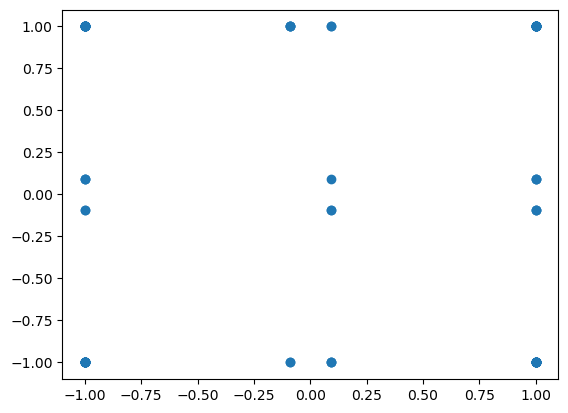

In [8]:
import matplotlib.pyplot as plt

for n in range(1):
    reaction_design = dexpy.optimal.build_optimal(5, run_count=88, order=ModelOrder.quadratic, randomize=False)
    #print(reaction_design)
    
    column_names = ['time', 'temp', 'geg', 'gege', 'gegegeq']
    reaction_design.columns = column_names   # This is some pandas stuff

    plt.scatter(reaction_design['time'], reaction_design['temp'])

plt.show()

In [9]:
import dexpy.optimal
from dexpy.model import ModelOrder

reaction_design = dexpy.optimal.build_optimal(2, run_count=8, order=ModelOrder.quadratic, randomize=False)

column_names = ['time', 'temp']
actual_lows = { 'time': 40, 'temp': 80 }
actual_highs = { 'time': 50, 'temp': 90 }
reaction_design.columns = column_names
print(coded_to_actual(reaction_design, actual_lows, actual_highs))

        time       temp
0  40.000000  90.000000
1  40.000000  80.000000
2  46.363636  84.545455
3  44.545455  90.000000
4  40.000000  85.454545
5  50.000000  80.000000
6  44.545455  80.000000
7  50.000000  90.000000


c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = design_point[f]
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  design_point[f] = low + ((high - low) / (steps - 1)) * s
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:135: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by posi

c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = design_point[f]
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:122: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  design_point[f] = low + ((high - low) / (steps - 1)) * s
c:\Users\RUCT\AppData\Local\anaconda3\Lib\site-packages\dexpy\optimal.py:135: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by posi

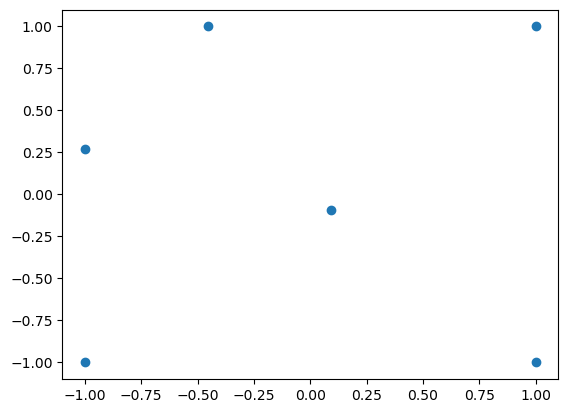

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

reaction_design = dexpy.optimal.build_optimal(2, order=ModelOrder.quadratic)
column_names = ['time', 'temp']
reaction_design.columns = column_names

plt.scatter(reaction_design['time'], reaction_design['temp'])


#fg = sns.lmplot(data=reaction_design, fit_reg=False)
#ax = fg.axes[0, 0]
#ax.set_xticks([-1, 0, 1])
#ax.set_xticklabels(['40 min', '45 min', '50 min'])
#ax.set_yticks([-1, 0, 1])
#ax.set_yticklabels(['80C', '85C', '90C'])
plt.show()

# TONS OF TEST CODE BELOW

In [11]:
from patsy import dmatrix, ModelDesc

import patsy

import math

from dexpy.model import make_model, ModelOrder  # See if I can get these removed in the end

## copy/paste some functions from dexpy

Some basic functions

In [12]:
def hit_and_run(x0, constraint_matrix, bounds, n_samples, thin = 1):
    """A basic implementation of the hit and run sampler

    :param x0: The starting value of sampler.
    :param constraint_matrix: A matrix of constraints in the form Ax <= b.
    :param bounds: A vector of bounds in the form Ax <= b.
    :param n_samples: The numbers of samples to return.
    :param thin: The thinning factor. Retain every 'thin' sample (e.g. if thin = 2, retain every 2nd sample)

    This function is from https://github.com/statease/dexpy
    Copyright 2016 Stat-Ease, Inc.
    License: Apache License, Version 2.0
    License link: https://github.com/statease/dexpy/blob/master/LICENSE
    """
    x = np.copy(x0)
    p = len(x)

    out_samples = np.zeros((n_samples, p))

    for i in range(0, n_samples):
        thin_count = 0

        while thin_count < thin:
            thin_count = thin_count + 1

            random_dir = np.random.normal(0.0, 1.0, p)
            random_dir = random_dir / np.linalg.norm(random_dir)

            denom = constraint_matrix.dot(random_dir)
            intersections = (bounds - constraint_matrix.dot(x)) / denom
            t_low  = np.max(intersections[denom < 0])
            t_high  = np.min(intersections[denom > 0])

            u = np.random.uniform(0, 1)
            random_distance = t_low + u * (t_high - t_low)
            x_new = x + random_distance * random_dir

        out_samples[i, ] = x_new
        x = x_new

    return(out_samples)

In [13]:
def bootstrap(factor_names, model, run_count):
    """Create a minimal starting design that is non-singular."""
    md = ModelDesc.from_formula(model)  # Potentially remove this dependency - Not as important as we look to still be using dmatrix from patsy
    #print(md)  
    model_size = len(md.rhs_termlist)
    if run_count == 0:
        run_count = model_size
    if model_size > run_count:
        raise ValueError("Can't build a design of size {} "
                         "for a model of rank {}. "
                         "Model: '{}'".format(run_count, model_size, model))

    factor_count = len(factor_names)
    x0 = np.zeros(factor_count)
    # add high/low bounds to constraint matrix
    constraint_matrix = np.zeros((factor_count * 2, factor_count))
    bounds = np.zeros(factor_count * 2)
    c = 0
    for f in range(factor_count):
        constraint_matrix[c][f] = -1
        bounds[c] = 1
        c += 1
        constraint_matrix[c][f] = 1
        bounds[c] = 1
        c += 1

    start_points = hit_and_run(x0, constraint_matrix, bounds, run_count)
    #print(start_points)
    #print(type(start_points))

    d = pd.DataFrame(start_points, columns=factor_names)   # I need to remove this dependency - Change function to something that doesn't require pandas but still works
    #d = np.array
    #print(d)  # This is something that I need to remove - Just for testing purposes
    X = dmatrix(model, d)
    #print(X)  # This is something that I need to remove - Just for testing purposes

    return (d, X)

Now also in my own version

In [14]:
def own_bootstrap(factor_names, model, run_count):
    """Create a minimal starting design that is non-singular.
    
    
    This function is modified from https://github.com/statease/dexpy
    Copyright 2016 Stat-Ease, Inc.
    License: Apache License, Version 2.0
    License link: https://github.com/statease/dexpy/blob/master/LICENSE
    """
    md = patsy.ModelDesc.from_formula(model)
    model_size = len(md.rhs_termlist)
    if run_count == 0:
        run_count = model_size
    if model_size > run_count:
        raise ValueError("Can't build a design of size {} "
                         "for a model of rank {}. "
                         "Model: '{}'".format(run_count, model_size, model))

    factor_count = len(factor_names)
    x0 = np.zeros(factor_count)
    # add high/low bounds to constraint matrix
    constraint_matrix = np.zeros((factor_count * 2, factor_count))
    bounds = np.zeros(factor_count * 2)
    c = 0
    for f in range(factor_count):
        constraint_matrix[c][f] = -1
        bounds[c] = 1
        c += 1
        constraint_matrix[c][f] = 1
        bounds[c] = 1
        c += 1

    start_points = hit_and_run(x0, constraint_matrix, bounds, run_count)

    d = start_points

    d_dict = {}
    for i in range(0, factor_count):
        d_dict[factor_names[i]] = start_points[:,i]

    X = dmatrix(model, d_dict, return_type='matrix')

    return (d, X)

In [15]:
#bootstrap(factor_names, model, run_count)

#How does d and X change when I change away from pandas


# NEED TO FIND EXAMPLE FACTOR NAMES AND MODEL TO TEST THIS FUNCTION



In [16]:
dmatrix('a + b + a:b', data={'a': [1, 2, 3], 'b': [4, 5, 6]}, return_type='matrix')

DesignMatrix with shape (3, 4)
  Intercept  a  b  a:b
          1  1  4    4
          1  2  5   10
          1  3  6   18
  Terms:
    'Intercept' (column 0)
    'a' (column 1)
    'b' (column 2)
    'a:b' (column 3)

Below are utility functions that do not use anything but np. I probably do not need to change anything here but time will tell

In [17]:
def update(XtXi, new_point, old_point):
    """rank-2 update of the variance-covariance matrix

    Equation (6) from Meyer and Nachtsheim :cite:`MeyerNachtsheim1995`.

    This function is from https://github.com/statease/dexpy
    Copyright 2016 Stat-Ease, Inc.
    License: Apache License, Version 2.0
    License link: https://github.com/statease/dexpy/blob/master/LICENSE
    """
    F2 = np.vstack((new_point, old_point))
    F1 = F2.T.copy()
    F1[:,1] *= -1
    FD = np.dot(F2, XtXi)
    I2x2 = np.identity(2) + np.dot(FD, F1)
    Inverse2x2 = np.linalg.inv(I2x2)
    F2x2FD = np.dot(np.dot(F1, Inverse2x2), FD)
    return XtXi - np.dot(XtXi, F2x2FD)

def expand_point(design_point, code):
    """Converts a point in factor space to conform with the X matrix.
    
    This function is from https://github.com/statease/dexpy
    Copyright 2016 Stat-Ease, Inc.
    License: Apache License, Version 2.0
    License link: https://github.com/statease/dexpy/blob/master/LICENSE
    """
    return np.array(eval(code, {}, design_point))

def delta(X, XtXi, row, new_point):
    """Calculates the change in D-optimality from exchanging a point.

    This is equation (1) in Meyer and Nachtsheim :cite:`MeyerNachtsheim1995`.

    This function is from https://github.com/statease/dexpy
    Copyright 2016 Stat-Ease, Inc.
    License: Apache License, Version 2.0
    License link: https://github.com/statease/dexpy/blob/master/LICENSE
    """
    old_point = X[row]

    added_variance = np.dot(new_point, np.dot(XtXi, new_point.T))
    removed_variance = np.dot(old_point, np.dot(XtXi, old_point.T))
    covariance = np.dot(new_point, np.dot(XtXi, old_point.T))
    return (
        1 + (added_variance - removed_variance) +
            (covariance * covariance - added_variance * removed_variance)
    )


In [18]:
def own_expand_point(design_point, code):
    """Converts a point in factor space to conform with the X matrix.
    
    This function is from https://github.com/statease/dexpy
    Copyright 2016 Stat-Ease, Inc.
    License: Apache License, Version 2.0
    License link: https://github.com/statease/dexpy/blob/master/LICENSE
    """
    
    return np.array(eval(code, {}, design_point))

In [65]:
"""Functions for creating and working with a model."""

from enum import Enum

class ModelOrder(Enum):
    """Represents a full model order."""

    constant = 0
    linear = 1
    quadratic = 2
    cubic = 3

def make_quadratic_model(factor_names, include_squared = True):
    """Creates patsy formula representing a quadratic model."""
    return make_model(factor_names, ModelOrder.quadratic, include_squared)

def make_model(factor_names, model_order, include_powers = True):
    """Creates patsy formula representing a given model order."""
    if model_order == ModelOrder.quadratic:
        interaction_model = "({})**2".format("+".join(factor_names))
        if not include_powers:
            return interaction_model
        squared_terms = "pow({}, 2)".format(",2)+pow(".join(factor_names))
        return "{}+{}".format(interaction_model, squared_terms)

    if model_order == ModelOrder.cubic:
        interaction_model = "({})**3".format("+".join(factor_names))
        if not include_powers:
            return interaction_model
        squared_terms = "pow({}, 2)".format(",2)+pow(".join(factor_names))
        cubed_terms = "pow({}, 3)".format(",3)+pow(".join(factor_names))
        return "+".join([interaction_model, squared_terms, cubed_terms])

    return "+".join(factor_names)

In [91]:
def make_model_own(factor_names, model_order, include_powers = True):
    """Creates patsy formula representing a given model order."""
    if model_order == 1:
        return "+".join(factor_names)
    
    elif model_order == 2:
        interaction_model = "({})**2".format("+".join(factor_names))
        if not include_powers:
            return interaction_model
        squared_terms = "pow({}, 2)".format(",2)+pow(".join(factor_names))
        return "{}+{}".format(interaction_model, squared_terms)

    elif model_order == 3:
        interaction_model = "({})**3".format("+".join(factor_names))
        if not include_powers:
            return interaction_model
        squared_terms = "pow({}, 2)".format(",2)+pow(".join(factor_names))
        cubed_terms = "pow({}, 3)".format(",3)+pow(".join(factor_names))
        return "+".join([interaction_model, squared_terms, cubed_terms])
    
    else:
        raise Warning("Model order not supported")

    #return "+".join(factor_names)

This is the main function. It is important that it works. Result does not nessesarily have to be the same as in dexpy.
Maybe I can avoid using dexpy.design.get_factor_names(factor_count). It simply gives X1, X2 etc. 
I might be able to just pipe in the names from the defined space group.


In [59]:
def build_optimal_own(factor_names, **kwargs):
    r"""Builds an optimal design.

    This uses the Coordinate-Exchange algorithm from Meyer and Nachtsheim 1995
    :cite:`MeyerNachtsheim1995`.

    :param factor_names: The names of the factors in the design.
    :type factor_names: list of str

    :Keyword Arguments:
        * **order** (:class:`ModelOrder <dexpy.model.ModelOrder>`) -- \
            Builds a design for this order model. \
            Mutually exclusive with the **model** parameter.
        * **model** (`patsy formula <https://patsy.readthedocs.io>`_) -- \
            Builds a design for this model formula. \
            Mutually exclusive with the **order** parameter.
        * **run_count** (`integer`) -- \
            The number of runs to use in the design. This must be equal\
            to or greater than the rank of the model.

    _______________________________________________________

    This function is adapted from https://github.com/statease/dexpy
    Copyright 2016 Stat-Ease, Inc.
    License: Apache License, Version 2.0
    License link: https://github.com/statease/dexpy/blob/master/LICENSE
    """

    factor_count = len(factor_names)
    no_pandas = True

    model = kwargs.get('model', None)

    if model is None:
        order = kwargs.get('order', ModelOrder.quadratic)  
        model = make_model(factor_names, order, True)   # HERE IS SOMETHING THAT I NEED TO LOOK AT

    run_count = kwargs.get('run_count', 0)

    # first generate a valid starting design
    if no_pandas:
        (design, X) = own_bootstrap(factor_names, model, run_count)
    else:
        (design, X) = bootstrap(factor_names, model, run_count)

    # Enable conversion between design points and X matrix
    functions = []
    for _, subterms in X.design_info.term_codings.items():
        sub_funcs = []
        for subterm in subterms:
            for factor in subterm.factors:
                eval_code = X.design_info.factor_infos[factor].state['eval_code']
                if eval_code[0] == 'I':
                    eval_code = eval_code[1:]
                sub_funcs.append(eval_code)
        if not sub_funcs:
            functions.append("1") # intercept
        else:
            functions.append("*".join(sub_funcs))

    full_func = "[" + ",".join(functions) + "]"
    print('full_func', full_func)
    code = compile(full_func, "<string>", "eval")

    # set up the algorithm parameters
    steps = 12
    low = -1
    high = 1

    XtXi = np.linalg.inv(np.dot(np.transpose(X), X))
    (_, d_optimality) = np.linalg.slogdet(XtXi)

    design_improved = True
    swaps = 0
    evals = 0
    min_change = 1.0 + np.finfo(float).eps
    while design_improved:
        design_improved = False
        for i in range(0, len(design)):
            if no_pandas:
                design_point = {}
                for ii in range(0, factor_count):
                    design_point[factor_names[ii]] = design[i, ii]
                factor_loop = enumerate(factor_names)
            else:
                design_point = design.iloc[i]
                factor_loop = range(0, factor_count)

            for f in factor_loop:
                if no_pandas:
                    index_factor = f[0]
                    f = f[1]
                original_value = design_point[f]
                original_expanded = X[i]
                best_step = -1
                best_point = []
                best_change = min_change

                for s in range(0, steps):

                    design_point[f] = low + ((high - low) / (steps - 1)) * s
                    new_point = expand_point(design_point, code)
 
                    change_in_d = delta(X, XtXi, i, new_point)
                    evals += 1

                    if change_in_d - best_change > np.finfo(float).eps:
                        best_point = new_point
                        best_step = s
                        best_change = change_in_d

                if best_step >= 0:
                    # update X with the best point
                    design_point[f] = low + ((high - low) / (steps - 1)) * best_step
                    if no_pandas:
                        design[i, index_factor] = design_point[f]
                    XtXi = update(XtXi, best_point, X[i])
                    X[i] = best_point

                    d_optimality -= math.log(best_change)
                    design_improved = True
                    swaps += 1

                else:
                    # restore the original design point value
                    design_point[f] = original_value
                    X[i] = original_expanded

    #logging.info("{} swaps evaluated, {} executed ({:.2f}%)".format(evals, swaps, 100*(swaps / evals)))  # Maybe reconsider this. Outcomment for now

    return design

In [105]:
def build_optimal_no_pandas(factor_names, **kwargs):
    r"""Builds an optimal design.

    This uses the Coordinate-Exchange algorithm from Meyer and Nachtsheim 1995
    :cite:`MeyerNachtsheim1995`.

    :param factor_names: The names of the factors in the design.
    :type factor_names: list of str

    :Keyword Arguments:
        * **order** (:class:`ModelOrder <dexpy.model.ModelOrder>`) -- \
            Builds a design for this order model. \
            Mutually exclusive with the **model** parameter.
        * **model** (`patsy formula <https://patsy.readthedocs.io>`_) -- \
            Builds a design for this model formula. \
            Mutually exclusive with the **order** parameter.
        * **run_count** (`integer`) -- \
            The number of runs to use in the design. This must be equal\
            to or greater than the rank of the model.

    _______________________________________________________

    This function is adapted from https://github.com/statease/dexpy
    Copyright 2016 Stat-Ease, Inc.
    License: Apache License, Version 2.0
    License link: https://github.com/statease/dexpy/blob/master/LICENSE
    """

    factor_count = len(factor_names)
    model = kwargs.get('model', None)

    if model is None:
        order = kwargs.get('order', 2)
        model = make_model_own(factor_names, order)

    run_count = kwargs.get('run_count', 0)

    # first generate a valid starting design
    (design, X) = own_bootstrap(factor_names, model, run_count)

    # Enable conversion between design points and X matrix
    functions = []
    for _, subterms in X.design_info.term_codings.items():
        sub_funcs = []
        for subterm in subterms:
            for factor in subterm.factors:
                eval_code = X.design_info.factor_infos[factor].state['eval_code']
                if eval_code[0] == 'I':
                    eval_code = eval_code[1:]
                sub_funcs.append(eval_code)
        if not sub_funcs:
            functions.append("1") # intercept
        else:
            functions.append("*".join(sub_funcs))

    full_func = "[" + ",".join(functions) + "]"
    code = compile(full_func, "<string>", "eval")

    # set up the algorithm parameters
    steps = 12
    low = -1
    high = 1

    XtXi = np.linalg.inv(np.dot(np.transpose(X), X))
    (_, d_optimality) = np.linalg.slogdet(XtXi)

    design_improved = True
    swaps = 0
    evals = 0
    min_change = 1.0 + np.finfo(float).eps
    while design_improved:
        design_improved = False
        for i in range(0, len(design)):
            design_point = {}
            for ii in range(0, factor_count):
                design_point[factor_names[ii]] = design[i, ii]
            for index_factor, f in enumerate(factor_names):
                original_value = design_point[f]
                original_expanded = X[i]
                best_step = -1
                best_point = []
                best_change = min_change

                for s in range(0, steps):

                    design_point[f] = low + ((high - low) / (steps - 1)) * s
                    new_point = expand_point(design_point, code)
 
                    change_in_d = delta(X, XtXi, i, new_point)
                    evals += 1

                    if change_in_d - best_change > np.finfo(float).eps:
                        best_point = new_point
                        best_step = s
                        best_change = change_in_d

                if best_step >= 0:
                    # update X with the best point
                    design_point[f] = low + ((high - low) / (steps - 1)) * best_step
                    design[i, index_factor] = design_point[f]
                    XtXi = update(XtXi, best_point, X[i])
                    X[i] = best_point

                    d_optimality -= math.log(best_change)
                    design_improved = True
                    swaps += 1

                else:
                    # restore the original design point value
                    design_point[f] = original_value
                    X[i] = original_expanded

    return design

# WRITE SOME TESTS TO SEE IF THE THINGS I MESS WITH WORK: THEY ARE BELOW HERE

In [106]:
print(ModelOrder.quadratic)

ModelOrder.quadratic


In [107]:
reaction_design = build_optimal_no_pandas(['a', 'b', 'c', 'fwf'], run_count=18, order=ModelOrder.quadratic)
print(reaction_design)

Warning: Model order not supported

In [110]:
reaction_design = build_optimal_no_pandas(['a', 'b', 'c'], run_count=18, order=3)
print(reaction_design)

[[-1.         -1.          1.        ]
 [-0.45454545 -0.45454545 -1.        ]
 [ 1.         -1.          1.        ]
 [ 1.         -1.         -1.        ]
 [-1.          1.         -1.        ]
 [ 0.27272727 -1.         -0.45454545]
 [ 1.         -0.27272727 -0.45454545]
 [-1.          1.          1.        ]
 [-0.45454545  0.45454545  0.63636364]
 [-1.         -1.         -1.        ]
 [ 0.45454545 -0.45454545  1.        ]
 [-1.          0.45454545 -0.45454545]
 [ 1.          1.         -1.        ]
 [ 1.          1.          1.        ]
 [-0.45454545  1.         -0.45454545]
 [ 0.45454545  0.45454545 -1.        ]
 [-1.         -0.63636364  0.45454545]
 [ 0.63636364  1.          0.45454545]]


In [64]:
# Example 1
#import pandas as pd

#reaction_design = build_optimal_own(['a', 'b'], run_count=5, model='a + b + a:b')
reaction_design = build_optimal_own(['a', 'b'], run_count=9, order=ModelOrder.cubic)

#reaction_design = dexpy.optimal.build_optimal(2, run_count=5, model='X1 + X2 + X1:X2')#
print(reaction_design)
#print(type(reaction_design))

X [[ 1.00000000e+00 -2.32784834e-01  6.19389701e-01 -1.44184529e-01
   5.41887791e-02  3.83643601e-01 -1.26143260e-02  2.37624895e-01]
 [ 1.00000000e+00  7.25941995e-01  9.05147454e-01  6.57084548e-01
   5.26991780e-01  8.19291914e-01  3.82565464e-01  7.41579991e-01]
 [ 1.00000000e+00  7.72078776e-01  8.36211554e-01  6.45621193e-01
   5.96105637e-01  6.99249763e-01  4.60240510e-01  5.84720731e-01]
 [ 1.00000000e+00  7.36183432e-01  7.90888963e-01  5.82239352e-01
   5.41966046e-01  6.25505352e-01  3.98986424e-01  4.94705280e-01]
 [ 1.00000000e+00 -3.51572729e-02  1.28004637e-03 -4.50029396e-05
   1.23603384e-03  1.63851872e-06 -4.34555789e-05  2.09737994e-09]
 [ 1.00000000e+00  8.66220943e-02  2.24134320e-01  1.94149842e-02
   7.50338722e-03  5.02361933e-02  6.49959116e-04  1.12596550e-02]
 [ 1.00000000e+00  5.31021769e-01  2.43976769e-01  1.29556975e-01
   2.81984119e-01  5.95246638e-02  1.49739706e-01  1.45226351e-02]
 [ 1.00000000e+00  5.06296950e-01  3.26408185e-01  1.65259468e-01
 

In [82]:
print(reaction_design)

    X1   X2
0  1.0 -1.0
1  1.0  1.0
2 -1.0  1.0
3 -1.0 -1.0
4 -1.0  1.0


In [73]:
b = bootstrap(['X1', 'X2'], 'X1 + X2 + X1:X2', 4)




ModelDesc(lhs_termlist=[],
          rhs_termlist=[Term([]),
                        Term([EvalFactor('X1')]),
                        Term([EvalFactor('X2')]),
                        Term([EvalFactor('X1'), EvalFactor('X2')])])


In [26]:
b = own_bootstrap(['X1', 'X2'], 'X1 + X2 + X1:X2', 4)

print(b)

print(type(b))
print(type(b[0]))
print(type(b[1]))

(array([[-0.79328645,  0.85732278],
       [-0.17061747,  0.81622036],
       [ 0.09834362, -0.03874327],
       [ 0.57610891,  0.22833971]]), DesignMatrix with shape (4, 4)
  Intercept        X1        X2     X1:X2
          1  -0.79329   0.85732  -0.68010
          1  -0.17062   0.81622  -0.13926
          1   0.09834  -0.03874  -0.00381
          1   0.57611   0.22834   0.13155
  Terms:
    'Intercept' (column 0)
    'X1' (column 1)
    'X2' (column 2)
    'X1:X2' (column 3))
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'patsy.design_info.DesignMatrix'>


In [105]:
# THIS IS SOME VERSION OF OWN BOOTSTRAP THAT WORKS


factor_names = ['X1', 'X2']
run_count = 4
model = 'X1 + X2 + X1:X2 + pow(X1,2)'

factor_count = len(factor_names)
x0 = np.zeros(factor_count)
# add high/low bounds to constraint matrix
constraint_matrix = np.zeros((factor_count * 2, factor_count))
bounds = np.zeros(factor_count * 2)
c = 0
for f in range(factor_count):
    constraint_matrix[c][f] = -1
    bounds[c] = 1
    c += 1
    constraint_matrix[c][f] = 1
    bounds[c] = 1
    c += 1

start_points = hit_and_run(x0, constraint_matrix, bounds, run_count)

print(start_points)
print(type(start_points))

# Alternative dmatrix_maker

#print(start_points[:,0])
d = {}
for i in range(0, factor_count):
    d[factor_names[i]] = start_points[:,i]

#d = {factor_names[0]: start_points[:,0], factor_names[1]: start_points[:,1]}  # This needs to be generalized to work with any number of factors
#print(d)
X = dmatrix(model, d)

# dmatrix is nice but I could get around it. I would need to write a small function or make the formular input a bit more tricky

print(X)
dmatrix(model, d)
#print(X)

[[-0.08270149  0.05239263]
 [ 0.12613884 -0.84141597]
 [ 0.21338828  0.99737545]
 [ 0.67637472  0.97885651]]
<class 'numpy.ndarray'>
[[ 1.         -0.08270149  0.05239263 -0.00433295  0.00683954]
 [ 1.          0.12613884 -0.84141597 -0.10613523  0.01591101]
 [ 1.          0.21338828  0.99737545  0.21282824  0.04553456]
 [ 1.          0.67637472  0.97885651  0.6620738   0.45748276]]


DesignMatrix with shape (4, 5)
  Intercept        X1        X2     X1:X2  pow(X1, 2)
          1  -0.08270   0.05239  -0.00433     0.00684
          1   0.12614  -0.84142  -0.10614     0.01591
          1   0.21339   0.99738   0.21283     0.04553
          1   0.67637   0.97886   0.66207     0.45748
  Terms:
    'Intercept' (column 0)
    'X1' (column 1)
    'X2' (column 2)
    'X1:X2' (column 3)
    'pow(X1, 2)' (column 4)

In [97]:
X.design_info.term_codings.items()

odict_items([(Term([]), [SubtermInfo(factors=(), contrast_matrices={}, num_columns=1)]), (Term([EvalFactor('X1')]), [SubtermInfo(factors=(EvalFactor('X1'),), contrast_matrices={}, num_columns=1)]), (Term([EvalFactor('X2')]), [SubtermInfo(factors=(EvalFactor('X2'),), contrast_matrices={}, num_columns=1)]), (Term([EvalFactor('X1'), EvalFactor('X2')]), [SubtermInfo(factors=(EvalFactor('X1'), EvalFactor('X2')),
            contrast_matrices={},
            num_columns=1)]), (Term([EvalFactor('pow(X1, 2)')]), [SubtermInfo(factors=(EvalFactor('pow(X1, 2)'),),
            contrast_matrices={},
            num_columns=1)])])

# Full example - Helper functions above

In [98]:
from ProcessOptimizer.space import Integer, Categorical, Real, Space
import numpy as np

space_design = Space(dimensions=[Real(10, 40, name='ul indicator'),
            Real(20, 100, name='ul base'),
            Real(20, 100, name='ul acid'),
            Real(0, 50, name='ul water1'),
            Real(0, 10, name='ul water2'),])
                                 